In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from DecisionTreeRegressor import DecisionTreeRegressor as MyDecisionTreeRegressor
from RandomForestRegressor import RandomForestRegressor as MyRandomForestRegressor
%matplotlib inline

In [3]:
boston = load_boston()
X = boston.data
y = boston.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=97)

In [45]:
%%time
depths = []
train_scores = []
scores = []

for depth in range(1, 12):
    DTR = DecisionTreeRegressor(max_depth=depth, min_samples_leaf=2)
    depths.append(depth)
    DTR.fit(X_train, y_train)
    train_scores.append(DTR.score(X_train, y_train))
    scores.append(DTR.score(X_test, y_test)) 

print(max(scores))

0.88495505558
CPU times: user 22.7 ms, sys: 1.05 ms, total: 23.8 ms
Wall time: 23.4 ms


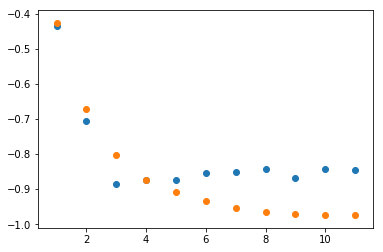

In [46]:
plt.scatter(depths, [-1 * score for score in scores])
plt.scatter(depths, [-1 * score for score in train_scores])

In [19]:
%%time
depths = []
train_scores = []
scores = []

MyDTR = MyDecisionTreeRegressor()
for depth in range(1, 12):
    depths.append(depth)
    MyDTR.fit(X_train, y_train, max_depth=depth)
    train_scores.append(MyDTR.score(X_train, y_train))
    scores.append(MyDTR.score(X_test, y_test))
    print(type(MyDTR.predict(X_test)[0]))

print(max(scores))

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
0.88495505558
CPU times: user 30.2 s, sys: 127 ms, total: 30.3 s
Wall time: 30.5 s


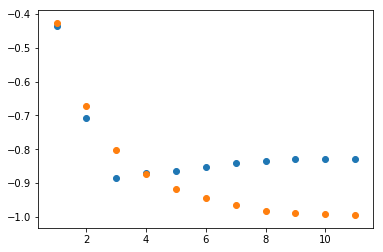

In [48]:
plt.scatter(depths, [-1 * score for score in scores])
plt.scatter(depths, [-1 * score for score in train_scores])

In [53]:
%%time
depths = []
train_scores = []
scores = []

for depth in range(1, 12):
    RFR = RandomForestRegressor(max_depth=depth, n_estimators=10, bootstrap=True, max_features='auto')
    depths.append(depth)
    RFR.fit(X_train, y_train)
    train_scores.append(RFR.score(X_train, y_train))
    scores.append(RFR.score(X_test, y_test))

print(max(scores))

0.928247783142
CPU times: user 201 ms, sys: 1.66 ms, total: 203 ms
Wall time: 204 ms


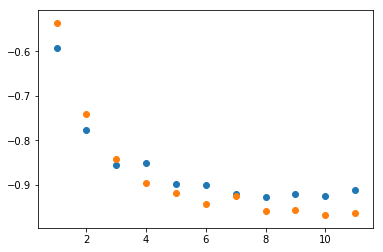

In [54]:
plt.scatter(depths, [-1 * score for score in scores])
plt.scatter(depths, [-1 * score for score in train_scores])

In [20]:
%%time
depths = []
train_scores = []
scores = []

MyRFR = MyRandomForestRegressor()
for depth in range(1, 12):
    depths.append(depth)
    MyRFR.fit(X_train, y_train, max_depth=depth, n_estimators=10, n_features='all')
    train_scores.append(MyRFR.score(X_train, y_train))
    scores.append(MyRFR.score(X_test, y_test))
    print(type(MyRFR.predict(X_test)[0]))

print(max(scores))

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


KeyboardInterrupt: 

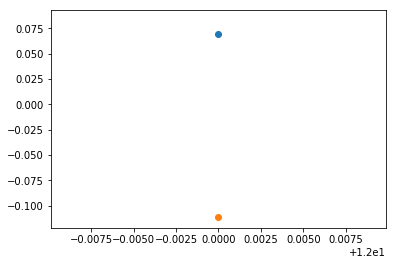

In [6]:
plt.scatter(depths, [-1 * score for score in scores])
plt.scatter(depths, [-1 * score for score in train_scores])

In [9]:
preds = []
for i, tree in enumerate(MyRFR.trees):
    preds.append(tree.predict(X_test))

In [26]:
y_hat = sum(preds) / 20

In [15]:
type(preds[2][0])

numpy.float64

In [18]:
for n in y_test:
    print(type(n))

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.fl

In [25]:
from scoring import R2

In [27]:
R2(y_test, y_hat)

-0.069210414695371369

In [28]:
y_hat

array([  9.405     ,  17.40263889,  23.72496154,  15.52496429,
        23.16      ,  14.15760714,  17.430125  ,  19.08673743,
        20.72366987,  27.83      ,  16.225     ,  14.57897436,
        27.64      ,  20.635     ,   8.99732143,  11.062     ,
         4.6575    ,   8.395     ,  27.145     ,  16.83733333,
        17.8       ,  19.415     ,  17.01723528,  18.42497003,
        17.19499567,  20.60454365,  14.70166667,  18.51      ,
        19.06933214,  13.82579762,  22.43      ,  15.49      ,
        19.0175    ,  15.65166234,  16.43358333,  19.725     ,
        10.46333333,   8.63357143,   7.012     ,   9.2825    ,
         7.43      ,  14.11      ,  11.5225    ,   7.78166667,
        17.80683333,  20.031     ,  16.58863095,  19.54870208,
        16.70388889,  19.50140194,  18.4       ,  20.8       ,
        14.24      ,  14.7675    ,  19.11217424,  20.32233333,
        19.694     ,  21.32614011,  31.23      ,   4.845     ,
        11.08933333,  12.75633333,  13.755     ,  10.36

In [29]:
y_test

array([ 19.7,  20.3,  29.4,  21.8,  34.6,  16.6,  19.8,  16.8,  23.3,
        50. ,  25. ,  23.1,  35.4,  48.3,  17.8,  19.1,  10.5,  13.3,
        50. ,  18.6,  23.9,  50. ,  20.1,  18.3,  19. ,  23.2,  24.3,
        27. ,  22.8,  20.8,  41.7,  31.6,  22.5,  18.5,  19.9,  46.7,
        13.5,  19.4,   8.1,  13. ,   8.3,  18.3,  17.3,  13.8,  21.6,
        28.4,  17.7,  22.9,  21.5,  19.4,  29. ,  44.8,  32.5,  15.3,
        22.2,  24.4,  29.1,  24.2,  43.8,  10.4,  19.3,  21.7,  20.2,
        14.4,  22. ,  31.1,  23.8,  15. ,  30.5,  25. ,  20.4,  33.4,
        25. ,  34.7,  22.6,  19.2,  18.4,  13.2,  45.4,  17.5,  13.6,
        21. ,  22.4,  23.1,  23.5,  27.5,  20. ,  22. ,  13.6,  32.7,
        21. ,  14.9,  36. ,  22.2,   8.8,  34.9,  33.1,  42.8,  16.1,
        16.4,  24.1,  23. ,  16.7,  21.7,  22.9,  24.4,  48.8,  17.8,
        23. ,  20.1,  13.8,  50. ,  26.6,  19.5,  20.7,  21.8,  22.2,
        26.2,  23.2,  32.4,  50. ,  14.9,  22.9,  21.4,  12.7,  13.1,
        43.5,  20.1,